# 

# Titanic Data Exploration
The goal of this project is to demonstrate my knowledge with classical machine learning models and improve my data cleaning, processing and analysis.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data loading and analysis
We start by loading `data/train.csv` which contains our titanic passenger's features.

In [3]:
raw_data = pd.read_csv('../data/train.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Our data has many columns. Based on Kaggle's evaluations, `Survived` is the column that we are concerned about, it is the target label we are trying to predict. There are two types of value for our label, 0 means the passenger didn't survive, and 1 means the passenger did survive.

There are many other columns, but a few will prove fruitful to training our model. Based on what I know of Titanic, the columns that could determine the survivability of a passenger are:
- `Pclass`: your socioeconomic status can determine your survivability
- `Sex`: women (and children) are likely to be evacuated
- `Age`: age determines fitness
- `SibSp`: having sibling(s) can hinder you from boarding a lifeboat initially
- `Parch`: having parents and children on board can hinder you from boarding a lifeboat initially
- `Fare`: expensive ticket means a sign of wealth which could influence your chance of living
- 

Let's extract the noted columns with our target `Surived`

In [26]:
pass_data = raw_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']]
pass_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


Next, we check the data for any signs of NA and anomalies.

In [28]:
num_rows = len(pass_data)
na_rate = len(pass_data[pass_data['Pclass'].isna()]) / num_rows
print(f"Pclass's NA rate: {na_rate}")
na_rate = len(pass_data[pass_data['Sex'].isna()]) / num_rows
print(f"Sex's NA rate: {na_rate}")
na_rate = len(pass_data[pass_data['Age'].isna()]) / num_rows
print(f"Age's NA rate: {na_rate}")
na_rate = len(pass_data[pass_data['SibSp'].isna()]) / num_rows
print(f"SibSp's NA rate: {na_rate}")
na_rate = len(pass_data[pass_data['Parch'].isna()]) / num_rows
print(f"Parch's NA rate: {na_rate}")
na_rate = len(pass_data[pass_data['Fare'].isna()]) / num_rows
print(f"Fare's NA rate: {na_rate}")
na_rate = len(pass_data[pass_data['Fare'] == 0]) / num_rows
print(f"Fare's 0 rate: {na_rate}")


pass_data.describe()

Pclass's NA rate: 0.0
Sex's NA rate: 0.0
Age's NA rate: 0.19865319865319866
SibSp's NA rate: 0.0
Parch's NA rate: 0.0
Fare's NA rate: 0.0
Fare's 0 rate: 0.016835016835016835


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Few interesting notes:
- The huge wealth disparity on board (+-$49 std), with the most expensive fare being $512.3292
- Someone's fare is 0, indicating missing data (1.68%)
- The Youngest person on board is just a few months, while the oldest person is 80. Age may play an interesting age here, though the average age is 30, it may not be the main factor in determining survivability

19% of the rows have a missing value for the `Age` attribute. Since this is a numerous amount, we will use a stupid heuristic: we will calculate the global age mean and set it to the missing rows. We will also do the same for zero fares.

In [29]:
pass_data.loc[pass_data['Age'].isna(), 'Age'] = pass_data['Age'].mean()
pass_data.loc[pass_data['Fare'] == 0, 'Fare'] = pass_data['Fare'].mean()

na_rate = len(pass_data[pass_data['Age'].isna()]) / num_rows
print(f"Age's NA rate: {na_rate}")
na_rate = len(pass_data[pass_data['Fare'].isna()]) / num_rows
print(f"Fare's NA rate: {na_rate}")
na_rate = len(pass_data[pass_data['Fare'] == 0]) / num_rows
print(f"Fare's 0 rate: {na_rate}")

pass_data.describe()

Age's NA rate: 0.0
Fare's NA rate: 0.0
Fare's 0 rate: 0.0


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.746366
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.514272
min,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.100000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,32.204208
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's check the survival rate by `Sex`, `Pclass`, `Gender`, `Age`, `Fare`, and `Cabin` (we will process this first). We will plot all of these data

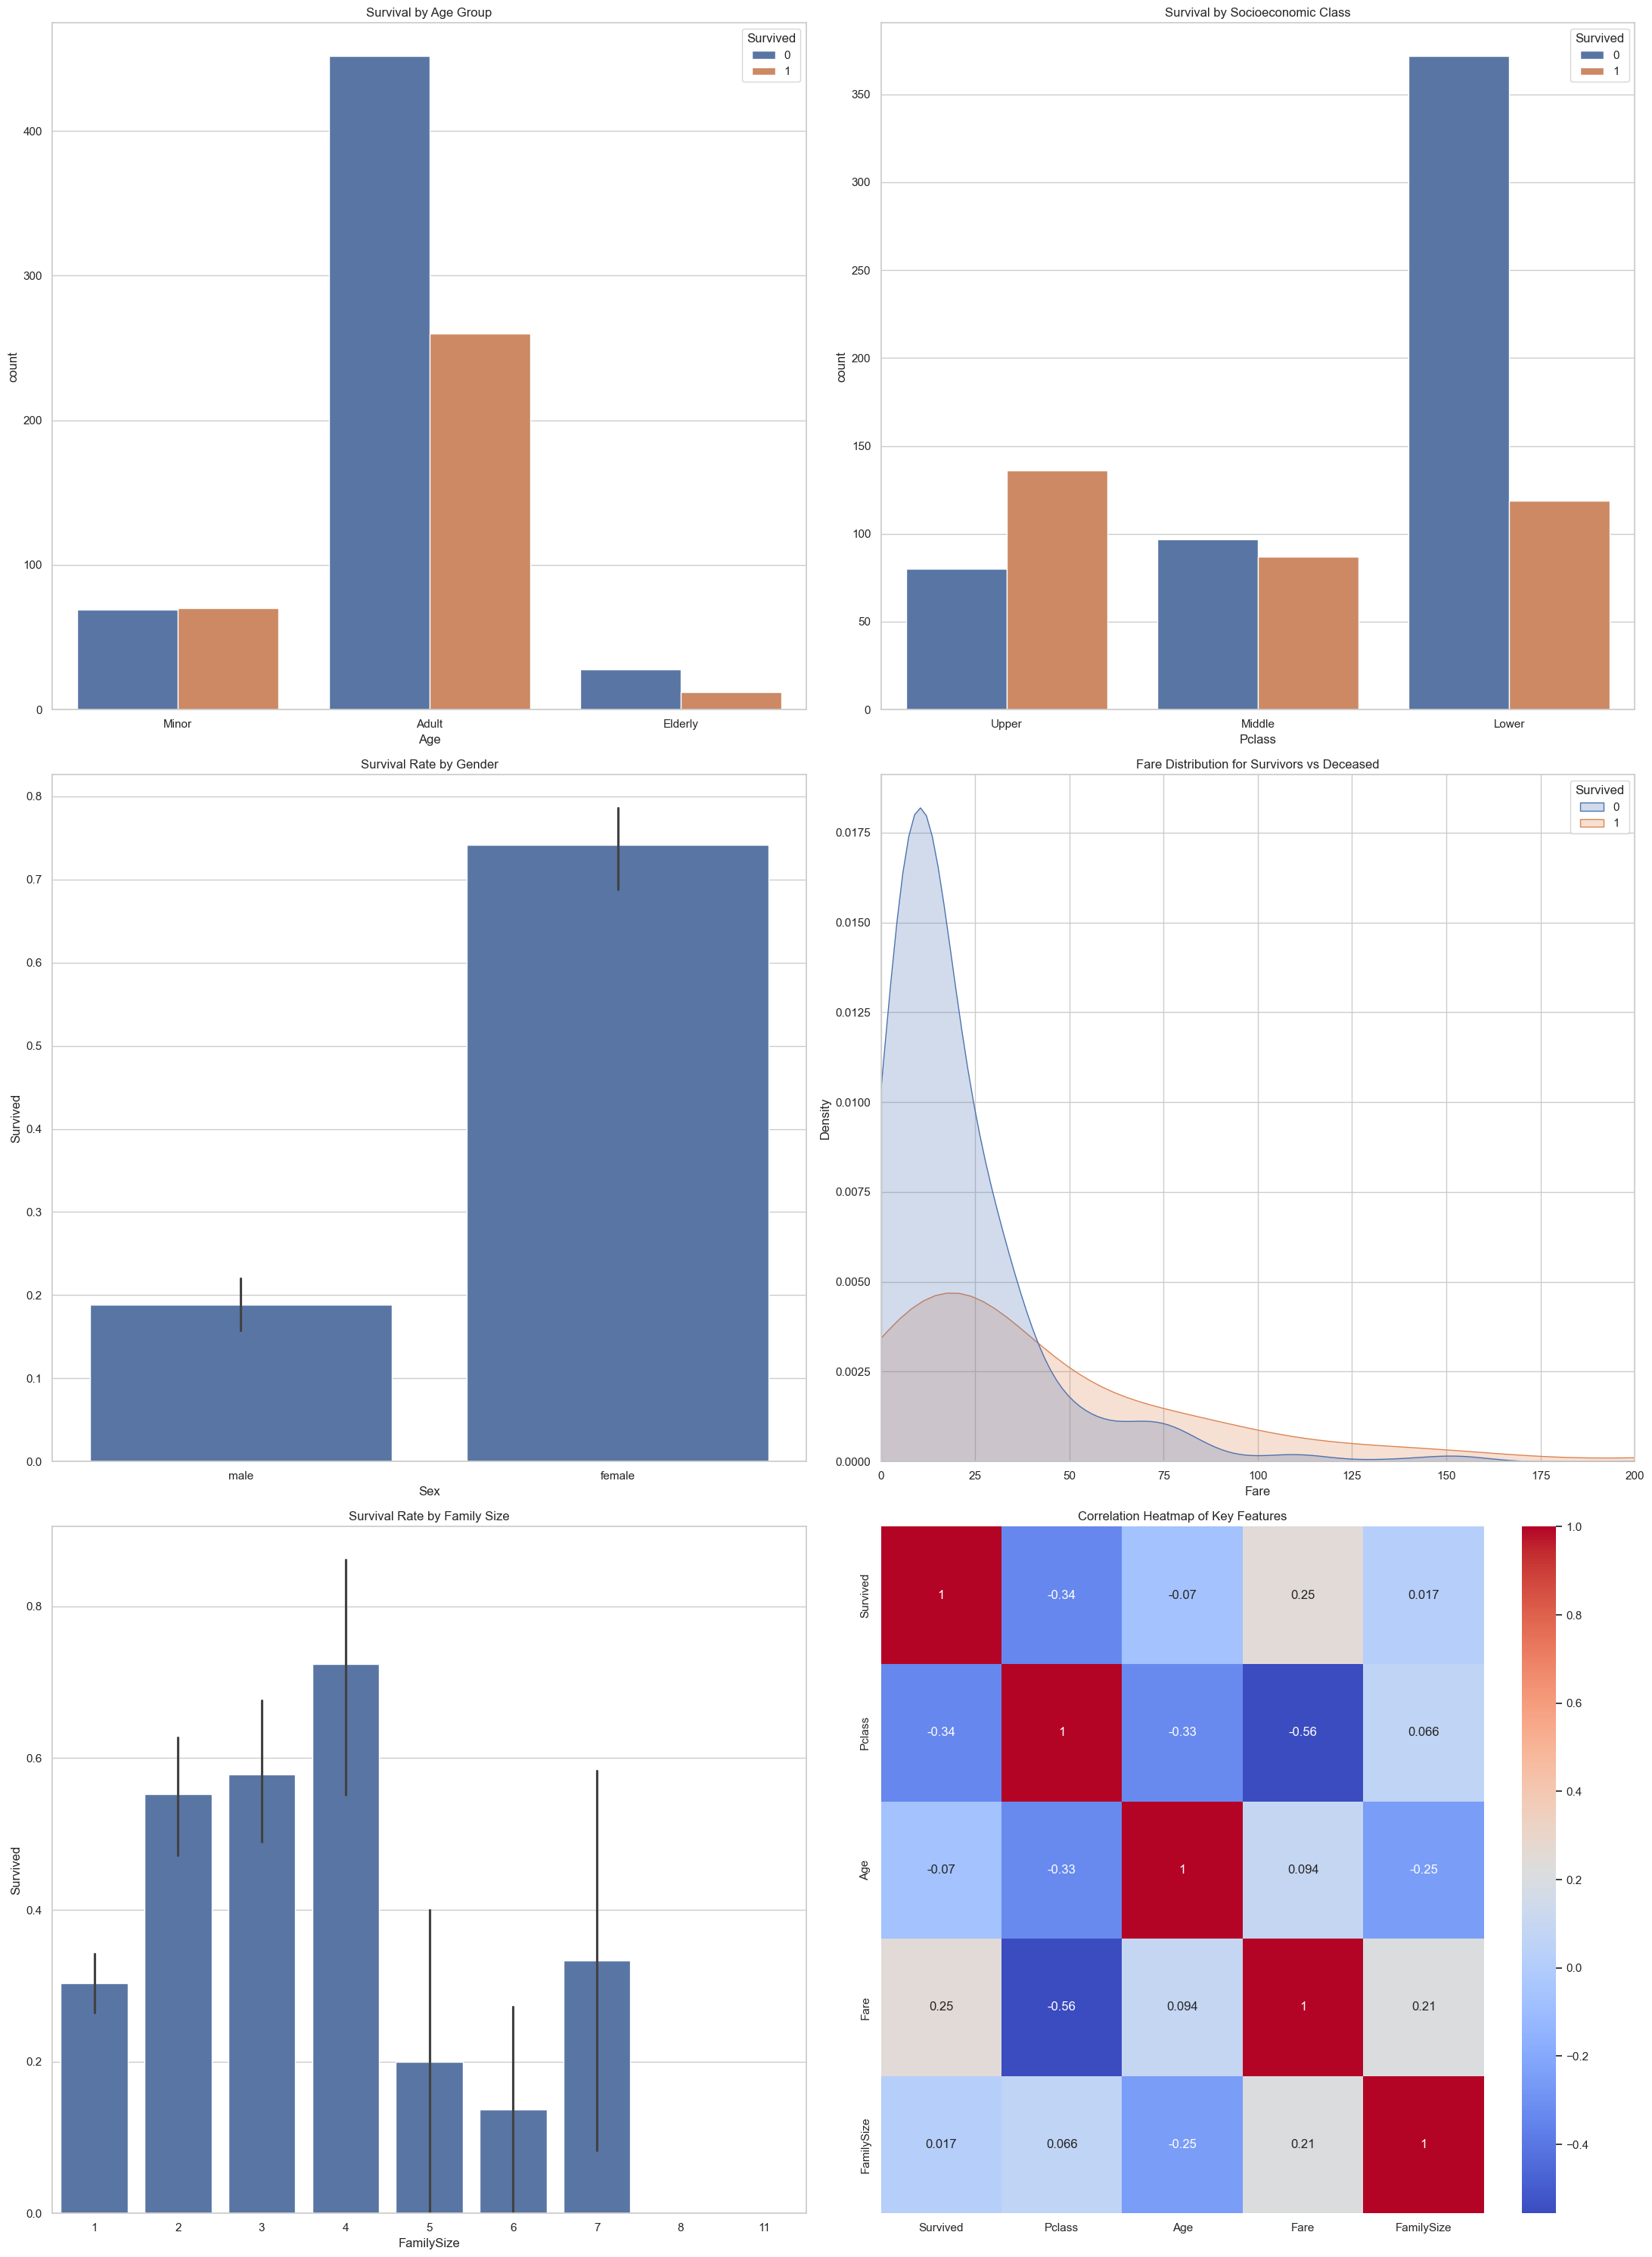

In [45]:
pclasses = pd.cut(pass_data['Pclass'], [0, 1, 2, 3], labels=['Upper', 'Middle', 'Lower']) 
ages = pd.cut(pass_data['Age'], [0, 18, 55, 80], labels=['Minor', 'Adult', 'Elderly']) 
pass_data['FamilySize'] = pass_data['SibSp'] + pass_data['Parch'] + 1 
pass_data['IsAlone'] = (pass_data['FamilySize'] == 1).astype(int)

sns.set_theme(style='whitegrid') 

fig, axes = plt.subplots(3, 2, figsize=(22, 30))

sns.countplot(x=ages, hue=pass_data['Survived'], ax=axes[0,0]) 
axes[0,0].set_title('Survival by Age Group')

sns.countplot(x=pclasses, hue=pass_data['Survived'], ax=axes[0,1]) 
axes[0,1].set_title('Survival by Socioeconomic Class')

sns.barplot(x='Sex', y='Survived', data=pass_data, ax=axes[1,0]) 
axes[1,0].set_title('Survival Rate by Gender')

sns.kdeplot(data=pass_data, x='Fare', hue='Survived', fill=True, ax=axes[1,1]) 
axes[1,1].set_xlim(0, 200) 
axes[1,1].set_title('Fare Distribution for Survivors vs Deceased')

sns.barplot(x='FamilySize', y='Survived', data=pass_data, ax=axes[2,0]) 
axes[2,0].set_title('Survival Rate by Family Size')

sns.heatmap(pass_data[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']].corr(), annot=True, cmap='coolwarm', ax=axes[2,1]) 
axes[2,1].set_title('Correlation Heatmap of Key Features')

plt.tight_layout() 
plt.show()